In [1]:
import networkx as nx
import pickle
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
m = pickle.load( open("bool_matrix.p", "rb"))
exc = pickle.load( open("graph_excit.p", "rb"))
inh = pickle.load( open("graph_inhib.p", "rb"))

Gexc = nx.DiGraph(exc)
Ginh = nx.DiGraph(inh)
m = nx.DiGraph(m)
receivers = m.in_degree()
transmitters = m.out_degree()

top_r = sorted(([ (v,k) for k, v in dict(receivers).items() ]), reverse=True)
top_t = sorted(([ (v,k) for k, v in dict(transmitters).items() ]), reverse=True)
#print(top_r)
ginh = nx.betweenness_centrality(Ginh)
gexc = nx.betweenness_centrality(Gexc)
top_inh = sorted(([ (v,k) for k, v in dict(ginh).items() ]), reverse=True)
top_exc = sorted(([ (v,k) for k, v in dict(gexc).items() ]), reverse=True)

/opt/conda/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Unrecognized location "top right". Falling back on "best"; valid locations are
	center right
	upper left
	lower center
	best
	upper right
	upper center
	lower left
	center
	right
	center left
	lower right

  % (loc, '\n\t'.join(self.codes)))


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


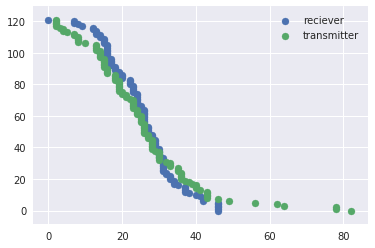

In [2]:
degree_rec = [ f[0] for f in top_r ]
axis_callr = [ i for i in range(0,len(degree_rec)) ]
degree_t = [ f[0] for f in top_t ]
axis_callt = [ i for i in range(0,len(degree_t)) ]
plt.scatter(degree_rec,axis_callr,label='reciever');
plt.scatter(degree_t,axis_callt,label='transmitter');
plt.legend(loc="top right")

In [3]:
top10e = top_exc[0:int(len(top_exc)/10)]
top50e = top_exc[0:int(len(top_exc)/2)]
top10i = top_inh[0:int(len(top_inh)/10)]
top50i = top_inh[0:int(len(top_inh)/2)]

In [4]:
degree_c10e = [ f[0] for f in top10e ]
axis_c10e = [ i for i in range(0,len(degree_c10e)) ]
degree_c50e = [ f[0] for f in top50e ]
axis_c50e = [ i for i in range(0,len(degree_c50e)) ]
degree_c10i = [ f[0] for f in top10i ]
axis_c10i = [ i for i in range(0,len(degree_c10i)) ]
degree_c50i = [ f[0] for f in top50i ]
axis_c50i = [ i for i in range(0,len(degree_c50i)) ]

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


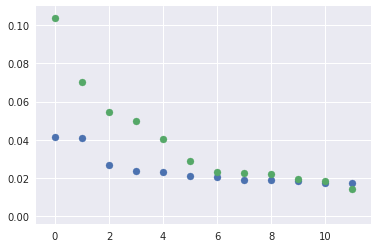

In [5]:

plt.clf()
plt.scatter(axis_c10e,degree_c10e,label='excitatory');
plt.scatter(axis_c10i,degree_c10i,label='inhibitory');
plt.show()

/opt/conda/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Unrecognized location "top right". Falling back on "best"; valid locations are
	center right
	upper left
	lower center
	best
	upper right
	upper center
	lower left
	center
	right
	center left
	lower right

  % (loc, '\n\t'.join(self.codes)))
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


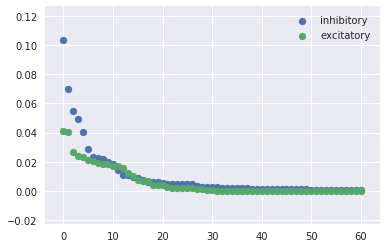

In [6]:

plt.clf()
plt.scatter(axis_c50i,degree_c50i,label='inhibitory');
plt.scatter(axis_c50e,degree_c50e,label='excitatory');
plt.legend(loc="top right")
plt.show()


/opt/conda/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Unrecognized location "top right". Falling back on "best"; valid locations are
	center right
	upper left
	lower center
	best
	upper right
	upper center
	lower left
	center
	right
	center left
	lower right

  % (loc, '\n\t'.join(self.codes)))


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


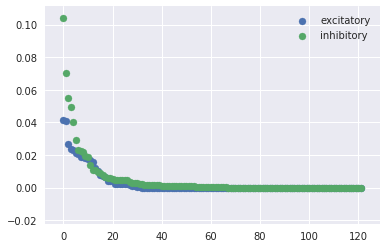

In [7]:
degree_calle = [ f[0] for f in top_exc ]
axis_calle = [ i for i in range(0,len(top_exc)) ]
degree_calli = [ f[0] for f in top_inh ]
axis_calli = [ i for i in range(0,len(top_inh)) ]
plt.scatter(axis_calle,degree_calle,label='excitatory');
plt.scatter(axis_calli,degree_calli,label='inhibitory');
plt.legend(loc="top right")